In [43]:
import os

from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np

## Motivating Example

First consider the deterministic case, in which we minimize the following objective function without constriants.

$$ f(x_1,x_2) = (x_1^2+x_2-11)^2 + (x_1 + x_2^2 -7)^2 $$

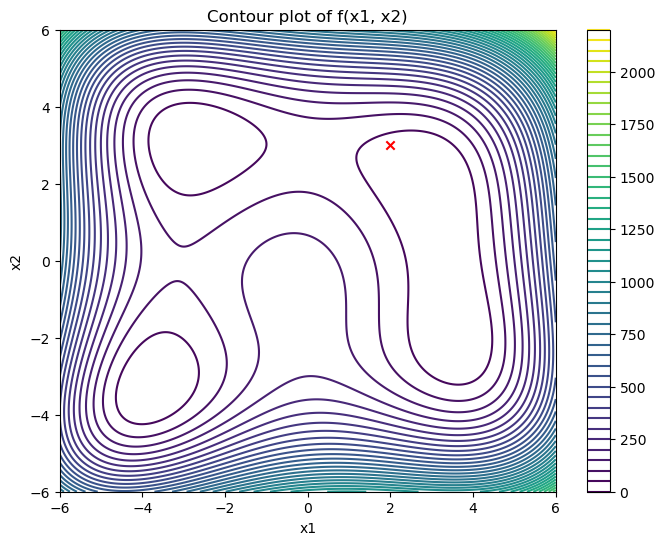

In [44]:
def f(x1, x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

# Create a meshgrid for x1 and x2
x1 = np.linspace(-6, 6, 400)
x2 = np.linspace(-6, 6, 400)
X1, X2 = np.meshgrid(x1, x2)

# Calculate Z values for the contours
Z = f(X1, X2)

# Plot the contour
plt.figure(figsize=(8, 6))
plt.scatter(2,3, color='red', marker='x')
contour = plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.title('Contour plot of f(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(contour)
plt.show()

In [45]:
def build_case_det():
    m = ConcreteModel()

    # ============== variables ==============
    m.x1 = Var()
    m.x2 = Var()

    # ============== objective ==============

    m.obj = Objective(expr= ((m.x1**2 + m.x2 - 11)**2 + (m.x1 + m.x2**2 - 7)**2), sense=minimize)
    return m

In [46]:
def solve_with_gams(m, solver="ipopth"):
    opt1 = SolverFactory('gams')
    io_options = dict()

    io_options['solver'] = solver
    res = opt1.solve(m,
        tee=True,
        keepfiles=True,
        add_options = ['option reslim=1000; option optcr=0.0;  option limrow=5000'],
        tmpdir=os.getcwd()+"/output",
        io_options=io_options)
    return res

In [47]:
m1_det = build_case_det()

solve_with_gams(m1_det)
m1_det.pprint()

--- Job model.gms Start 03/27/24 13:40:45 42.5.0 cf11b917 WEX-WEI x86 64bit/MS Windows
--- Applying:
    C:\GAMS\42\gmsprmNT.txt
    C:\Users\zyuliu\Documents\GAMS\gamsconfig.yaml
--- GAMS Parameters defined
    Input C:\Users\zyuliu\PycharmProjects\Optimization-Notebook\PCE_SO\output\model.gms
    Output C:\Users\zyuliu\PycharmProjects\Optimization-Notebook\PCE_SO\output\output.lst
    ScrDir C:\Users\zyuliu\PycharmProjects\Optimization-Notebook\PCE_SO\output\225a\
    SysDir C:\GAMS\42\
    CurDir C:\Users\zyuliu\PycharmProjects\Optimization-Notebook\PCE_SO\output\
    LogOption 3
Licensee: Small MUD - 5 User License                     G221121|0002AP-GEN
          University of Delaware, Chemical and Biomolecular EngineeriDC3967
          C:\Users\zyuliu\Documents\GAMS\gamslice.txt
          License Admin: Marianthi Ierapetritou, mgi@udel.edu              
Processor information: 1 socket(s), 4 core(s), and 8 thread(s) available
GAMS 42.5.0   Copyright (C) 1987-2023 GAMS Development.

### Now consider the stochastic case

$$ f(x_1,x_2) = (x_1^2+x_2-11 + 2\lambda)^2 + (x_1 + x_2^2 -7)^2 $$

where $ \lambda \sim \mathcal{N}(0,0.1) $

Here we want to

$$ Min \{ \mathbb{E}[f(x_1, x_2; \lambda)] \}$$

###

